# Systeme von gewöhnlichen Differentialgleichungen - Übungen

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


## Aufgaben

### Aufgabe SDG1: Radioaktiver Zerfall

Das radioaktive Isotop Jod zerfällt in das radioaktive Isotop Xenon, welches wiederum in etwas anderes (nicht wichtig) zerfällt. Die Halbwertszeiten von Jod und Xenon sind 6,7 h und 9,2 h.

1. Bestimmen Sie das System von DGL, das die Mengen von Jod und Xenon zu jedem Zeitpunkt beschreibt.
2. Bestimmen Sie die allgemeine Lösung des DGL-Systems, indem Sie

    1. die Lösung für Jod in die DGL für Xenon einsetzen und letztere DGL lösen,
    2. das DGL-System in Matrix-Form schreiben und es über Eigenwerte und Eigenvektoren lösen.


*Quelle:* Farlow, Stanley J.: An Introduction to Differential Equations and Their Applications. p. 353, Problem 31.

### Aufgabe SDG2: Newtonsche Bewegungsgleichung, Phasenraum

Wir betrachten einen Massenpunkt, der nur einen Freitheitsgrad in seiner Bewegung hat (z. B. entlang einer Schiene, eines Seils oder einer Straße). Seinen Ort zu einem Zeitpunkt $t$ schreiben wir als $x(t)$. Auf den Massenpunkt wirke eine konstante Kraft $F$. Newtons Bewegungsgleichung $m\ddot{x}(t) = F$ ist einen GDGL zweiter Ordnung für $x(t)$.

1. Transformieren Sie diese GDGL in ein System von GDGL.
2. Zeichnen Sie das zugehörige Vektorfeld auf $\mathbb{R}^2$ (Phasenraum). 
3. Überprüfen Sie, dass die Kurve $x(t) = x_0 + v_0t + \frac{F}{2m}t^2$ eine Lösung ist, wobei $x_0$ den Ort und $v_0$ die Geschwindigkeit zum Zeitpunkt $0$ bezeichnen.

### Aufgabe SDG3: Lineare DGL 2. Ordnung als System

Lösen Sie die Differentialgleichung $\ddot{y} + 3\dot{y} + 2y = 0$ mit den Anfangsbedingungen $y(0)=2$ und $\dot{y}(0)= -3$, indem Sie sie zuerst als System umschreiben und anschließend die `odeint`-Funktion am Computer verwenden. Vergleichen Sie Ihr Ergebnis mit der exakten analytischen Lösung.

## Lösungen

### Lösung SDG1: Radioaktiver Zerfall

Siehe `SDG1a.jpg`, `SDG1b.jpg` und `SDG1c.jpg`.

Zusammenhang Halbwertszeiten und Abklingkonstanten:

$\lambda_1 = \frac{\ln(2)}{6,7}$, $\lambda_2 = \frac{\ln(2)}{9,2}$

DGL-System:

$$\begin{align}
\dot{J} &= - \lambda_1 J \\
\dot{X} &=   \lambda_1 J - \lambda_2 X
\end{align}$$

Lösung:

$\begin{pmatrix} J(t) \\ X(t) \end{pmatrix} = 
c_1 e^{-\lambda_1 t} \begin{pmatrix} 1 \\ \frac{\lambda_1}{\lambda_2 - \lambda_1} \end{pmatrix} + 
c_2 e^{-\lambda_2 t} \begin{pmatrix} 0 \\ 1 \end{pmatrix}$ für Konstanten $c_1$ und $c_2$.

In [2]:
l1 = log(2)/6.7
l2 = log(2)/9.2
print("lambda_1 = ", l1)
print("lambda_2 = ", l2)

A = array([[-l1,   0],
           [ l1, -l2]])
print("A=\n", A)

lambda_1 =  0.10345480306864854
lambda_2 =  0.07534208484347232
A=
 [[-0.1034548   0.        ]
 [ 0.1034548  -0.07534208]]


In [3]:
L, V = eig(A)
print(L)
print(V)

[-0.07534208 -0.1034548 ]
[[ 0.          0.26222975]
 [ 1.         -0.96500547]]


In [4]:
print(l1/(l2 - l1))
print(V[1,1]/V[0,1])

-3.680000000000002
-3.680000000000002


### Lösung SDG2: Newtonsche Bewegungsgleichung, Phasenraum

Siehe `SDG2.jpg`.

1. $\dot{x}(t) = v(t)$, $\dot{v}(t) = \frac{F}{m}$
2. Siehe Code
3. Einsetzen in die Differentialgleichung, $x(0) = x_0$, $\dot{x}(0) = v_0$

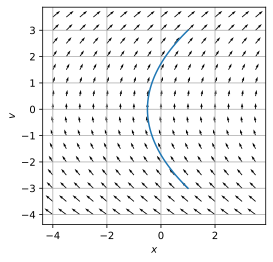

In [5]:
F = 3
m = 1

# Vektorfeld:
x = arange(-4, 4, .5)
v = arange(-4, 4, 0.5)
X, V = meshgrid(x, v)

Xp = V
Vp = ones(shape(X))*F/m

# Lösungskurve
t_ = linspace(0, 2)
x_0 =  1
v_0 = -3
x_ = x_0 + v_0*t_ + F/(2*m)*t_**2
v_ = v_0 + F/m*t_

figure(figsize=(4,4))
quiver(X, V, Xp, Vp)
plot(x_, v_)
xlabel('$x$')
ylabel('$v$')
grid(True)

### Lösung SDG3: Lineare DGL 2. Ordnung als System

Siehe `SDG3.jpg`.

In [6]:
t = linspace(0, 10, 100)
x0 = array([2, -3])

A = array([[ 0,  1],
           [-2, -3]])
def fun(x, t):
    xp = A@x
    return xp

x = odeint(fun, x0, t)

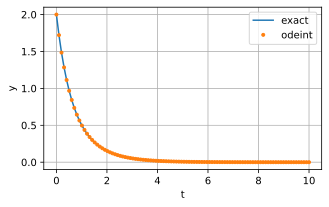

In [7]:
figure(figsize=(5,3))
plot(t, exp(-t) + exp(-2*t), '-', label = 'exact')
plot(t, x[:, 0], '.', label = 'odeint')
xlabel('t')
ylabel('y')
legend()
grid(True)

## Kurztestfragen

## Programmierprojekte

### Zweiraumwohnung mit Einraumheizung

Ein Gebäude besteht aus zwei Räumen A und B. Ein Ofen mit einer Wärmeleistung von 29.3 kW heizt Raum A, der eine Wärmekapazität von 0.37 K/kWh hat. 
Die Zeitkonstanten der Wände haben folgende Werte:

- Zeitkonstante Raum A zu Außen:  5 h
- Zeitkonstante Raum A zu Raum B: 2 h
- Zeitkonstante Raum B zu Außen: 10 h

Die Außentemperatur beträgt -17.7 °C, und die Räume haben eine Anfangstemperatur von 21 °C. 

**Aufgaben:**

1. Stellen Sie das GDGL System für die beiden Raumtemperaturen auf. Hinweis: Newtons Abkühlgesetz für die Temperatur $T(t)$ in einem Medium mit Zeitkonstante $\tau$ und Umgebungstemperatur $T_U$ lautet $\dot{T}(t) = -\frac{1}{\tau} [T(t) - T_U].$
2. Auf welche steady state Werte streben die Raumtemperaturen hin? Hinweis: Setzen Sie die Ableitungen im GDGL System auf Null, und lösen Sie das resultierende lineare Gleichungssystem.
3. Bestimmen Sie durch Lösen des GDGL Systems die Zeitverläufe der Raumtemperaturen über die folgenden 24 Stunden, und stellen Sie Ihr Ergebnis inkl. den steady state Werten graphisch dar.


**Lösung:**

Literatur: Farlow: An Introduction to Differential Equations an their Applications. p. 374 ff. Example 1: The two-room heating problem

Parameter:

- Außentemperatur $T_0 = -17.7$ °C
- Heizung: $P_H = 29.3$ kW (100000.0 BTU/h)
- Wärmekapazität des Raums A: $c_A = 0.37$ K/kWh  (5/9*0.2)/0.3 K/kWh
- Zeitkonstante Raum A zu Außen:  $\tau_{A0} =  5$ h
- Zeitkonstante Raum A zu Raum B: $\tau_{AB} =  2$ h
- Zeitkonstante Raum B zu Außen:  $\tau_{B0} = 10$ h

Variablen:

- $t$ ... Zeit in Stunden
- $T_A(t)$ ... Temperatur in Raum A zum Zeitpunkt $t$
- $T_B(t)$ ... Temperatur in Raum B zum Zeitpunkt $t$

Anfangsbedingungen:

- $T_A(0) = 21$ °C
- $T_B(0) = 21$ °C

GDGL System:

$$\begin{align}
\dot{T_A} &= c_A P_H  - \frac{1}{\tau_{A0}}(T_A - T_0) - \frac{1}{\tau_{AB}}(T_A - T_B) \\
          &= - \left(\frac{1}{\tau_{A0}} + \frac{1}{\tau_{AB}} \right) T_A + \frac{1}{\tau_{AB}}T_B + \frac{1}{\tau_{A0}} T_0 + c_A P_H \\
\dot{T_B} &= - \frac{1}{\tau_{AB}}(T_B - T_A) - \frac{1}{\tau_{B0}}(T_B - T_0) \\
          &= \frac{1}{\tau_{AB}} T_A - \left(\frac{1}{\tau_{B0}} + \frac{1}{\tau_{AB}} +  \right) T_B + \frac{1}{\tau_{B0}} T_0
\end{align}$$

In [8]:
T_0  = -17.7  # °C
T_A0 =  21.0  # °C
T_B0 =  21.0  # °C
P_H  =  29.3  # kW,    30 kW     = 100000.0 BTU/h
c_A  =   0.37 # K/kWh, 0.37 K/kWh = (0.2*(5/9)/0.3 K/kWh
t_A0 =   5.0  # h
t_AB =   2.0  # h
t_B0 =  10.0  # h

In [9]:
t = linspace(0, 24, num=100)
A = array([[ -(1/t_A0 + 1/t_AB),            1/t_AB  ],
           [             1/t_AB, -(1/t_B0 + 1/t_AB) ]])
print(A)
b = array([[ c_A*P_H + 1/t_A0*T_0 ],
           [           1/t_B0*T_0 ]])
print(b)
x_ = solve(A, -b)
print(x_)

x0 = array([[ T_A0 ],
            [ T_B0 ]])
x = zeros((2, len(t)))

[[-0.7  0.5]
 [ 0.5 -0.6]]
[[ 7.301]
 [-1.77 ]]
[[20.56235294]
 [14.18529412]]


In [10]:
L, V = eig(A)
print(L)
print(V)

[-1.15249378 -0.14750622]
[[-0.74145253 -0.67100532]
 [ 0.67100532 -0.74145253]]


In [11]:
d = solve(V, b)
print(d)

[[-6.60102437]
 [-3.58663886]]


In [12]:
c0 = solve(V, x0)
print(c0)

[[ -1.47939147]
 [-29.66161494]]


In [13]:
c_t = array([[c0[0,0]*exp(L[0]*t) - d[0]/L[0]*(1 - exp(L[0]*t))],
             [c0[1,0]*exp(L[1]*t) - d[1]/L[1]*(1 - exp(L[1]*t))]])

x = c_t[0,:]*V[:,[0]] + c_t[1,:]*V[:,[1]]

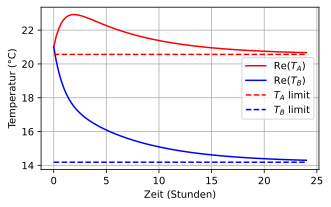

In [14]:
# Realteile
figure(figsize=(5,3))
plot(t, real(x[0,:]), 'r', label='Re($T_A$)')
plot(t, real(x[1,:]), 'b', label='Re($T_B$)')
plot(t, x_[0,0]*ones(shape(t)), '--r', label='$T_A$ limit')
plot(t, x_[1,0]*ones(shape(t)), '--b', label='$T_B$ limit')
xlabel('Zeit (Stunden)')
ylabel('Temperatur (°C)')
legend(loc='best')
grid(True)

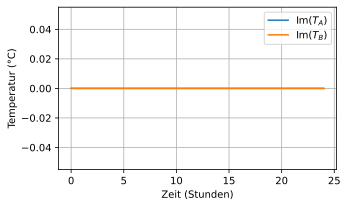

In [15]:
# Imaginärteile
figure(figsize=(5,3))
plot(t, imag(x[0,:]), label='Im($T_A$)')
plot(t, imag(x[1,:]), label='Im($T_B$)')
xlabel('Zeit (Stunden)')
ylabel('Temperatur (°C)')
legend(loc='best')
grid(True)

### Predator versus Calculator

Wir betrachten $x$ Tausend Raubtiere, z. B. Füchse, und $y$ Tausend Beutetiere, z. B. Hasen. Die Zahlen $x$ und $y$ hängen von der Zeit $t$ ab. Wir untersuchen das sogenannte [Lotka-Volterra-Modell](https://de.wikipedia.org/wiki/Lotka-Volterra-Gleichungen):

- Die Anzahl an Beutetieren steigt durch normales Bevölkerungswachstum mit einer Rate von $b >0$ ($b$ ist eine positive Geburtenrate-Konstante) und verringert sich mit einer Rate $r$, die proportional zur Anzahl der Räuber und der Anzahl der Beute ist, das heißt $-rxy$ ($r$ ist eine positive Sterberatekonstante): $\dfrac{\text{d}y}{\text{d}t} = by - rxy$

- Die Population der Raubtiere nimmt aufgrund von natürlichem Verfall (Verhungern) proportional zu ihrer Anzahl ab und steigt mit einer Rate proportional zur Anzahl der Räuber und zur Anzahl der Beute, das heißt: $\dfrac{\text{d}x}{\text{d}t} = -sx + cxy$ für Konstanten $s$ für Hunger und $c$ für Konsum.

Wir können die Zeit aus dem System dieser zwei gekoppelten Differentialgleichungen durch $\dfrac{\text{d}y}{\text{d}x} = \dfrac{\text{d}y/\text{d}t}{\text{d}x/\text{d}t}$ eliminieren und erhalten die Differentialgleichung

$$\dfrac{\text{d}y}{\text{d}x} = \dfrac{by - rxy}{-sx + cxy}$$

für eine Funktion $y(x)$.

*Aufgaben:* Wir verwenden die Werte $b = 4, r = 3, s = 6, c = 5.$

1. Lösen Sie $\dfrac{\text{d}y}{\text{d}x} = \dfrac{by - rxy}{-sx + cxy}$ von Hand druch Trennen der Variablen. Endergebnis: $cy - s\ln(y) = b\ln(x) - rx + C$ mit der Integrationskonstanten $C$. Dies ist eine implizite Form für die Kurven der Räuber-Beute-Population in der $x$-$y$-Ebene. Man kann zeigen, dass diese Kurven geschlossen sind.

2. Zeichnen Sie mit Python das Richtungsfeld der Differentialgleichung und die Kontourlinien der Lösung in der $x$-$y$-Ebene ein.

3. Bestimmen Sie von Hand und in Python mit [SciPys `root` Funktion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root) den Gleichgewichtspunkt des Systems, d. h. jenes $(x, y)$-Paar mit $\dfrac{\text{d}y}{\text{d}t}=0$ und $\dfrac{\text{d}x}{\text{d}t} = 0.$ Endergebnis: $(\frac{b}{r}, \frac{s}{c})$

4. Lösen Sie das System der zwei gekoppelten Differentialgleichungen $\dfrac{\text{d}y}{\text{d}t} = by - rxy$, $\dfrac{\text{d}x}{\text{d}t} = -sx + cxy$ mit Anfangsbedingungen $x(0) = 0.7$ und $y(0) = 0.9$ in Python mit dem Befehl [`odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint). Schreiben Sie dazu das System als eine gewöhnliche  Differentialgleichung für den Vektor $z(t):=\begin{pmatrix}x(t) \\ y(t)\end{pmatrix}$. Plotten Sie anschließend die Lösung.

    1. als zwei Funktionen $x(t)$ und $y(t)$ über der $t$-Achse.
    2. als Kurve $\begin{pmatrix}x(t) \\ y(t)\end{pmatrix}$ in der $x$-$y$-Ebene.


*Bemerkungen:* Varianten dieses Modells sind in der Ökologie wichtig für die Vorhersage und Untersuchung von zyklischen Variationen in Populationen. Zum Beispiel zeigt dieses einfache Modell bereits, dass, wenn eine Insekten-Beute und ihr Räuber im Gleichgewicht sind, das Töten sowohl von Räubern als auch von Beute mit einem Insektizid zu einem dramatischen Anstieg der Population der Beute führen kann, gefolgt von einem Anstieg der Räuber und so weiter auf zyklische Weise. Ähnliche Bemerkungen gelten für Füchse und Hasen usw.

*Abgabe:* Hochladen eines Ipython-Notebook als ipynb-Datei und aller evtl. zusätzlichen (Daten-)Files in ILIAS. Benennung der Files: `Nachname_Vorname_Dateibeschreibung.*`

**Lösung:**

*Quelle:* Jerrold Marsden and Alan Weinstein: *Calculus II*, Chapter 8, Section 8.5, Example 5, p. 400f. [Download](https://escholarship.org/search?q=marsden+weinstein+calculus)

In [16]:
# Parameter:
b = 4
r = 3
s = 6
c = 5

In [17]:
# Gleichgewichtspunkt:
eq = array([b/r, s/c])
print(eq)

[1.33333333 1.2       ]


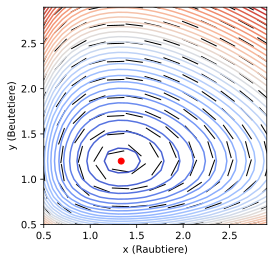

In [18]:
figure(figsize=(4,4))

# Richtungsfeld:
x = arange(0.5, 3, 0.2)
y = arange(0.5, 3, 0.2)
X, Y = meshgrid(x, y)
dX = (-s*X + c*X*Y)/sqrt( (-s*X + c*X*Y)**2 + (b*Y - r*X*Y)**2 )
dY = ( b*Y - r*X*Y)/sqrt( (-s*X + c*X*Y)**2 + (b*Y - r*X*Y)**2 )
quiver(X, Y, dX, dY, headwidth=0.0, scale = 10, pivot='middle')

# Konturlinien:
x = arange(0.5, 3, 0.1)
y = arange(0.5, 3, 0.1)
X, Y = meshgrid(x, y)
F = c*Y - s*log(Y) - b*log(X) + r*X
contour(X, Y, F, 35, cmap='coolwarm')

# Gleichgewichtspunkt:
plot(eq[0], eq[1], 'or')
xlabel('x (Raubtiere)')
ylabel('y (Beutetiere)')
grid(False)

In [19]:
from scipy import optimize

In [20]:
def my_fun(z):  # Gradient, z = [x, y]
    x = z[0]
    y = z[1]
    return [ b*y - r*x*y,
            -s*x + c*x*y]

sol = optimize.root(my_fun, [1, 1], jac=None)
#print(sol)
print("Solution:", sol.x)

Solution: [1.33333333 1.2       ]


In [21]:
# Definition der Richtungsfeldfunktion:
def fun(z, t): 
    x = z[0]
    y = z[1]
    return array([-s*x + c*x*y, b*y - r*x*y])

# A sequence of time points for which to solve for y. 
# The initial value point should be the first element of this sequence.
t = arange(0, 3, 0.01)

# The initial value:
z0 = array([0.7, 0.9])

# Solve numerically with odeint:
z_num = odeint(fun, z0, t)
x_num = z_num[:,0]
y_num = z_num[:,1]

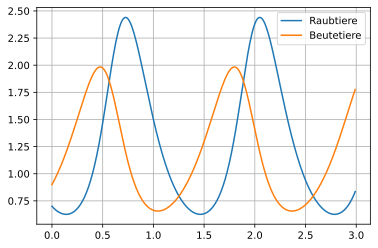

In [22]:
figure(figsize=(6,4))
plot(t, x_num, label='Raubtiere')
plot(t, y_num, label='Beutetiere')
legend()
grid(True)

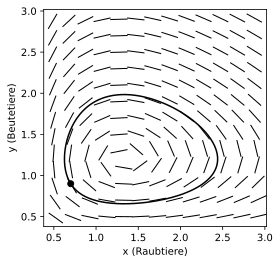

In [23]:
figure(figsize=(4,4))
# Richtungsfeld:
x = arange(0.5, 3, 0.2)
y = arange(0.5, 3, 0.2)
X, Y = meshgrid(x, y)
dX = (-s*X + c*X*Y)/sqrt( (-s*X + c*X*Y)**2 + (b*Y - r*X*Y)**2 )
dY = ( b*Y - r*X*Y)/sqrt( (-s*X + c*X*Y)**2 + (b*Y - r*X*Y)**2 )
quiver(X, Y, dX, dY, headwidth=0.0, scale = 10, pivot='middle')
# Lösung der gekoppelten DGLs:
plot(x_num, y_num, '-k')
plot(z0[0], z0[1], 'ok')
xlabel('x (Raubtiere)')
ylabel('y (Beutetiere)')
grid(False)

### Lineares System von GDGL

Wir betrachten zwei 100 Liter Tanks. Tank A ist anfangs mit 100 l Wasser gefüllt, das 25 kg Salz aufgelöst hat. Salzwasser mit 0,5 kg Salz pro Liter Wasser strömt mit einer konstanten Rate von 4 l/min in Tank A von außen ein. Die perfekt vermischte Lösung aus Tank A wird mit 6 l/min in Tank B gepumpt, der anfangs 100 l reines Wasser enthält. Die Lösung in Tank B wird mit 2 l/min in Tank A zurück gepumpt. Die Lösung aus Tank B strömt zudem mit 4 l/min aus dem Tank nach außen aus.

*Aufgaben:*

1. Fertigen Sie eine Skizze an, und stellen Sie das System von GDGL für die Massen $x_A(t)$ und $x_B(t)$ an Salz in den Tanks A und B für jeden Zeitpunkt $t\geq 0$ auf.
2. Erstellen Sie einen Plot des zugehörigen Geschwindigkeitsvektorfelds.
3. Bestimmen Sie die allgemeine homogene Lösung mittels Eigenwerten und Eigenvektoren, und interpretieren Sie diese.
4. Bestimmen Sie die steady state Lösung und verwenden Sie diese als partikuläre Lösung. Die allgemeine Lösung = partikuläre Lösung + allgemeine homogene Lösung. Lösen Sie das Anfangswertproblem, d. h. bestimmen Sie die Integrationskonstanten der allgemeinen Lösung.
5. Erstellen Sie einen Plot der Lösung des Anfangswertproblems über der Zeit und fügen Sie die Lösung des Anfangswertproblems in den Plot des Geschwindigkeitsvektorfelds ein.

*Abgabe:* Hochladen eines IPython-Notebooks als ipynb-Datei bis spätestens 24. Jänner 2019, 12:00 Uhr in ILIAS. Benennung des Files: `Nachname_Vorname_PP4.*`

**Lösung:**

Literatur: Farlow: An Introduction to Differential Equations and zheir Applications. Chapter 6, Example 2 The Two-Tank Mixing Problem. p. 367 ff. See [Errata](https://userpages.umbc.edu/~rostamia/farlow-errata.html)!

$$\begin{align}
\dot{x}_A(t) &= -0.06x_A(t) + 0.02x_B(t) + 2, \quad x_A(0) = 25 \\
\dot{x}_B(t) &=  0.06x_A(t) - 0.06x_B(t), \quad x_B(0) = 0 \\
\end{align}$$

in Matrixform: $\dot{x}(t) = Ax(t) + b$

In [24]:
t  = linspace(0, 200, num=500)
A  = array([[-0.06, 0.02],
           [ 0.06,-0.06 ]])
b  = array([[ 2.0],
            [ 0.0]])
x0 = array([[25.0],
            [ 0.0]])

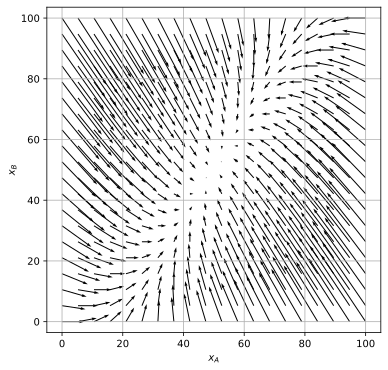

In [25]:
x_A = linspace(0, 100, 20)
x_B = linspace(0, 100, 20)
X_A, X_B = meshgrid(x_A, x_B)

figure(figsize=(6,6))
quiver(X_A, X_B, 
      -0.06*X_A + 0.02*X_B + 2*ones_like(X_A), 
       0.06*X_A - 0.06*X_B, scale=30)
axis('equal')
xlabel('$x_A$')
ylabel('$x_B$')
grid(True)

In [26]:
L, V = eig(A)
print("Eigenwerte:\n", L)
print("Eigenvektoren:\n", V)

Eigenwerte:
 [-0.02535898 -0.09464102]
Eigenvektoren:
 [[ 0.5       -0.5      ]
 [ 0.8660254  0.8660254]]


allgemeine homogene Lösung:

$x_h(t) = \begin{pmatrix}x_A(t) \\ x_B(t) \end{pmatrix} = c_A e^{-0.02535898t}v_A + c_B e^{-0.09464102t}v_B$

In [27]:
# steady state s erfüllt 0 = As + b:
s = solve(A, -b)
s

array([[50.],
       [50.]])

allgemeines Lösung:

$x(t) = s + x_h(t)$

In [28]:
# Integrationskonstanten der allgemeine Lösung: x0 = s + Vc

c0 = solve(V, x0 - s)
c0

array([[-53.86751346],
       [ -3.86751346]])

In [29]:
x = s + c0[0,0]*exp(L[0]*t)*V[:,[0]] + c0[1,0]*exp(L[1]*t)*V[:,[1]]
x.shape

(2, 500)

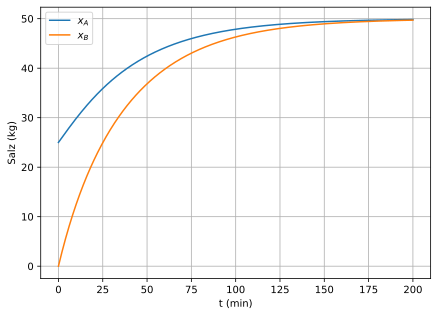

In [30]:
figure(figsize=(7, 5))
plot(t, x[0,:], label='$x_A$')
plot(t, x[1,:], label='$x_B$')
legend()
xlabel('t (min)')
ylabel('Salz (kg)')
grid(True)

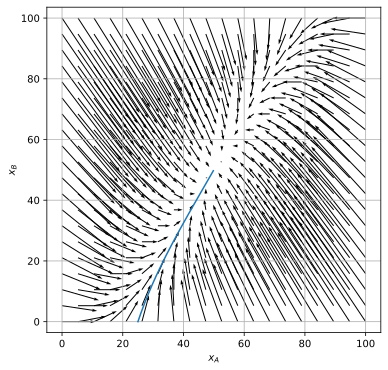

In [31]:
x_A = linspace(0, 100, 20)
x_B = linspace(0, 100, 20)
X_A, X_B = meshgrid(x_A, x_B)

figure(figsize=(6,6))
quiver(X_A, X_B, 
      -0.06*X_A + 0.02*X_B + 2*ones_like(X_A), 
       0.06*X_A - 0.06*X_B, scale=20)
plot(x[0,:], x[1,:])
axis('equal')
xlabel('$x_A$')
ylabel('$x_B$')
grid(True)